# ML Application

In this last homework, I would like you to practice the techniques you've learnt from earlier lectures and apply them to solve a real world application. 

Your first task is to pick a project topic. Pick an application that interests you, and explore how best to apply learning algorithms to solve it. I have some suggested projects below from Kaggle. However, if you've already had something in mind or if you're already working on a research or industry project that machine learning might apply to, then you may already have a great project idea.

Once you figure out the topic/application. You need to formulate it into one where you can apply ML. You will ask yourself questions like the following:
- What machine learning techniques are you planning to apply or improve upon?
- Is it supervised learning or unsupervised learning? Is it a regression problem or a classification one?
- What experiments are you planning to run?
- How do you quantify success?
- How do you avoid overfitting and underfitting?
- How do you handle categorical variables?
- ... 

Here are some popular Kaggle challenges. You are welcomed to explore other datasets and projects on Kaggle that might interest you and use those as your final project.
- [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)
- [Product Recommendation](https://www.kaggle.com/c/santander-product-recommendation)
- [Predict movie rating and success](https://www.kaggle.com/tmdb/tmdb-movie-metadata/home)
- [Predict used var value](https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value)

To evaluate one's work, we will grade based on the following criterions:
- The technical quality of the work. (i.e., Does the technical material make sense? Are the things tried reasonable? Are the ML algorithms used sound? Do the authors convey novel insight about the problem and/or algorithms?)
- Significance. (Did the authors choose an interesting or a “real" problem to work on, or only a small “toy" problem? Is this work likely to be useful and/or have impact in real world?)
- The novelty of the work. (Is this project applying a common technique to a well-studied problem, or is the problem or method relatively unexplored? Clearly identify the contribution of the work)
- Clarity in writing. (Do the authors articulate and clearly identify the findings from the data?)


In [1]:
# TODO
# Predict used car value

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
np.random.seed(0)
cars = pd.read_csv('../data/cars.csv')

In [3]:
# Analyze Data
cars.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
print(f'Number of null values is {cars.isnull().sum().sum()}')

Number of null values is 0


In [5]:
# Find Distrubution of Numerical Columns
cars.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [6]:
cars.describe(include = 'object')

,Make,Model,Trim,Type
count,804,804,804,804
unique,6,32,47,5
top,Chevrolet,Malibu,Sedan 4D,Sedan
freq,320,60,170,490


In [7]:
# Split data
y = cars['Price']
X = cars[['Mileage','Cylinder','Doors','Cruise','Sound','Leather', 'Price']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

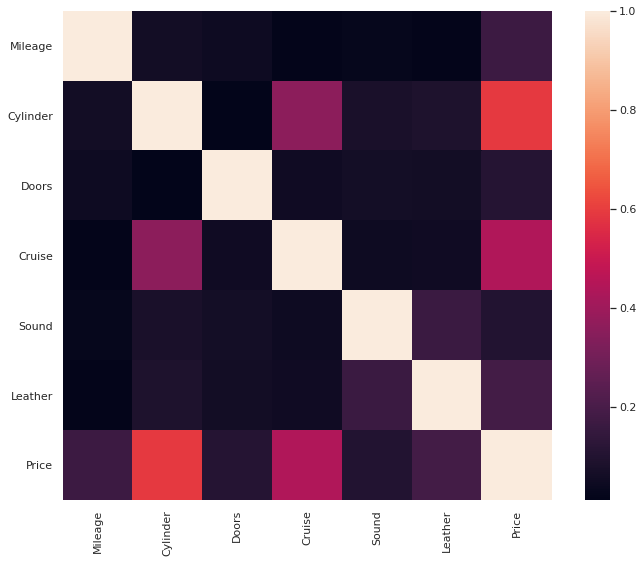

In [8]:
# Correlation between features
f, ax = plt.subplots(figsize=(12, 9))

corr_matrix = X_train.corr().abs()
sns.heatmap(corr_matrix, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show();

In [9]:
# Split data
y = cars['Price']
X = cars[['Mileage','Cylinder','Doors','Cruise','Sound','Leather']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train,y_train)

LinearRegression()

0.40380209473064266

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = LR.predict(X_test)
print("model Root Mean Squared Error: {}".format(round(np.sqrt(mean_squared_error(y_test, y_pred)))))
print("model Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, y_pred))))

model Root Mean Squared Error: 7675
model Mean Absolute Error: 5766


In [12]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 4, 6, 8], 
    'min_samples_split': [0.001, 0.01, 0.05, 0.1, 0.2],
}

dt = DecisionTreeRegressor()
grid = GridSearchCV(dt, parameters)
grid.fit(X_train, y_train)

# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [0.001, 0.01, 0.05, 0.1, 0.2]})

The best score is 0.5052233299590382
The best hyper parameter setting is {'max_depth': 4, 'min_samples_split': 0.2}


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = grid.predict(X_test)
print("model Root Mean Squared Error: {}".format(round(np.sqrt(mean_squared_error(y_test, y_pred)))))
print("model Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, y_pred))))

model Root Mean Squared Error: 6950
model Mean Absolute Error: 4784


In [14]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': [2, 4, 6, 8], 
    'min_samples_split': [0.001, 0.01, 0.05, 0.1, 0.2],
}

rf = RandomForestRegressor()
grid = GridSearchCV(rf, parameters)
grid.fit(X_train, y_train)

# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_split': [0.001, 0.01, 0.05, 0.1, 0.2]})

The best score is 0.5021459669063837
The best hyper parameter setting is {'max_depth': 4, 'min_samples_split': 0.1}


In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = grid.predict(X_test)
print("model Root Mean Squared Error: {}".format(round(np.sqrt(mean_squared_error(y_test, y_pred)))))
print("model Mean Absolute Error: {}".format(round(mean_absolute_error(y_test, y_pred))))

model Root Mean Squared Error: 6796
model Mean Absolute Error: 4665


In [16]:
# Predictions
x = {'Mileage':10000, 'Cylinder':4, 'Doors':2, 'Cruise':1, 'Sound':1, 'Leather':1}
new_car = pd.DataFrame.from_dict(data=x,orient='index').T
y_pred = grid.predict(new_car)
y_pred

array([22363.66185702])